# ÌîÑÎ°úÏ†ùÌä∏3 : Ïπ¥Î©îÎùº Ïä§Ìã∞Ïª§Ïï± ÎßåÎì§Í∏∞ Ï≤´Í±∏Ïùå

(1) ÏñºÍµ¥Ïù∏Ïãù Ïπ¥Î©îÎùºÏùò ÌùêÎ¶Ñ

  ÏñºÍµ¥Ïù¥ Ìè¨Ìï®Îêú ÏÇ¨ÏßÑ Ï§ÄÎπÑ -> ÏñºÍµ¥Ïùò bounding box Ï∞æÍ∏∞ -> Îàà, ÏΩî, ÏûÖ, Í∑Ä Îì±Ïùò landmark Ï∞æÍ∏∞ -> Ï∞æÏïÑÏßÑ ÏòÅÏó≠ÏúºÎ°ú Î∂ÄÌÑ∞ ÏõêÌïòÎäî Ïä§Ìã∞Ïª§ Î∂ÄÏ∞©
  

(2) dlib ÎùºÏù¥Î∏åÎü¨Î¶¨ÎûÄ?

 ÏÇ¨Ïù¥ÌÇ∑Îü∞ÏùÄ 2Í∞ÄÏßÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ï†úÍ≥µÌïúÎã§Í≥† ÏúÑÏóêÏÑú ÎßêÌñàÎäîÎç∞ Í∑∏ Ï§ëÏóêÏÑúÎèÑ Toy DatasetÏùÑ ÌôúÏö©ÌïòÏó¨ ÌîÑÎ°úÏ†ùÌä∏Î•º ÏßÑÌñâÌïòÍ≥†Ïûê ÌïúÎã§.
 
- Optical recognition of handwritten digits dataset : ÏÜêÍ∏ÄÏî® Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞
- Wine recognition dataset: ÏôÄÏù∏ Îç∞Ïù¥ÌÑ∞
- Breast cancer wisconsin (diagnostic) dataset : Ïú†Î∞©Ïïî Îç∞Ïù¥ÌÑ∞


## Î™©Ï∞®

1. ÏÇ¨ÏßÑ Ï§ÄÎπÑ
2. ÏñºÍµ¥ Í≤ÄÏ∂ú face detection


4. ÌöåÍ≥†

###**1. ÏÇ¨ÏßÑ Ï§ÄÎπÑ**

ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ±

In [ ]:
! mkdir project3
! mkdir project3/model
! ls

mkdir: cannot create directory ‚Äòproject3‚Äô: File exists
aiffel	 project3     selfie.jpg
cat.png  sample_data  shape_predictor_68_face_landmarks.dat.bz2


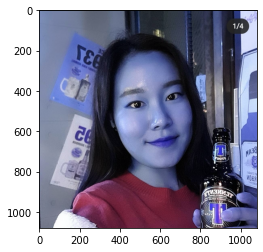

In [ ]:
#Ï∞æÏùÄ Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib

my_image_path = '/content/sample_data/selfie.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_show = img_bgr.copy()      # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄÎ•º Îî∞Î°ú Î≥¥Í¥ÄÌï©ÎãàÎã§
plt.imshow(img_bgr)
plt.show()

‚ùó pencvÎäî BGR(ÌååÎûë, ÎÖπÏÉâ, Îπ®Í∞ï)ÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê ÏõêÎ≥∏Ïùò Îπ®Í∞ÑÏÉâÏù¥ ÌååÎûÄÏÉâÏúºÎ°ú, ÏõêÎ≥∏Ïùò ÌååÎûÄÏÉâÏù¥ Îπ®Í∞ÑÏÉâÏúºÎ°ú Î∞òÏ†ÑÎêòÏñ¥ ÎÇòÏò®Îã§.

Îî∞ÎùºÏÑú Îã§Î•∏ Ïù¥ÎØ∏ÏßÄ ÎùºÏù¥Î∏åÎü¨Î¶¨ÏóêÏÑú ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî ÏÉâ Î≥¥Ï†ïÏ≤òÎ¶¨Í∞Ä ÌïÑÏöîÌïòÎã§.

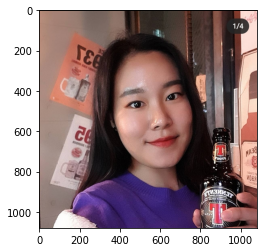

In [ ]:
#Ïù¥ÎØ∏ÏßÄ ÏÉâÏÉÅ Î≥µÍµ¨
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

‚ùó detector_hogÏùò Îëê Î≤àÏß∏ ÌååÎùºÎØ∏ÌÑ∞Îäî Ïù¥ÎØ∏ÏßÄ ÌîºÎùºÎØ∏ÎìúÏùò ÏàòÏûÖÎãàÎã§. Ïù¥ÎØ∏ÏßÄÎ•º upsampling Î∞©Î≤ïÏùÑ ÌÜµÌï¥ ÌÅ¨Í∏∞Î•º ÌÇ§Ïö∞Îäî Í≤ÉÏùÑ Ïù¥ÎØ∏ÏßÄ ÌîºÎùºÎØ∏ÎìúÎùºÍ≥† Ìï©ÎãàÎã§. Ïù¥ÎØ∏ÏßÄ ÌîºÎùºÎØ∏ÎìúÏóêÏÑú ÏñºÍµ¥ÏùÑ Îã§Ïãú Í≤ÄÏ∂úÌïòÎ©¥ ÏûëÍ≤å Ï¥¨ÏòÅÎêú ÏñºÍµ¥ÏùÑ ÌÅ¨Í≤å Î≥º Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Îçî Ï†ïÌôïÌïú Í≤ÄÏ∂úÏù¥ Í∞ÄÎä•Ìï©ÎãàÎã§. 

### **2. ÏñºÍµ¥ Í≤ÄÏ∂ú face detection**

dlibÏùò face detectorÎäî HOG(Histogram of Oriented Gradients)ÏôÄ SVM(Support Vector Machine)ÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú ÏñºÍµ¥ Ï∞æÍ∏∞

Ïù¥Îïå HOGÎäî Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏÉâÏÉÅÏùò Î≥ÄÌôîÎüâÏùÑ ÎÇòÌÉÄÎÇ∏ Í≤É

In [ ]:
# detectorÎ•º ÏÑ†Ïñ∏
detector_hog = dlib.get_frontal_face_detector()
print("üå´üõ∏")

# detector_hogÎ•º Ïù¥Ïö©Ìï¥ÏÑú ÏñºÍµ¥Ïùò bounding boxÎ•º Ï∂îÏ∂ú
# dlibÏùÄ rgb Ïù¥ÎØ∏ÏßÄÎ•º ÏûÖÎ†•ÏúºÎ°ú Î∞õÍ∏∞ ÎïåÎ¨∏Ïóê cvtColor() Î•º Ïù¥Ïö©Ìï¥ bgrÏùÑ rgbÎ°ú Î≥ÄÌôò
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("üå´üõ∏")

üå´üõ∏
üå´üõ∏


detector_hogÏùò Îëê Î≤àÏß∏ ÌååÎùºÎØ∏ÌÑ∞Îäî Ïù¥ÎØ∏ÏßÄ ÌîºÎùºÎØ∏ÎìúÏùò ÏàòÏûÖÎãàÎã§. 

Ïù¥ÎØ∏ÏßÄÎ•º upsampling Î∞©Î≤ïÏùÑ ÌÜµÌï¥ ÌÅ¨Í∏∞Î•º ÌÇ§Ïö∞Îäî Í≤ÉÏùÑ Ïù¥ÎØ∏ÏßÄ ÌîºÎùºÎØ∏ÎìúÎùºÍ≥† Ìï©ÎãàÎã§.

Ïù¥ÎØ∏ÏßÄ ÌîºÎùºÎØ∏ÎìúÏóêÏÑú ÏñºÍµ¥ÏùÑ Îã§Ïãú Í≤ÄÏ∂úÌïòÎ©¥ ÏûëÍ≤å Ï¥¨ÏòÅÎêú ÏñºÍµ¥ÏùÑ ÌÅ¨Í≤å Î≥º Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Îçî Ï†ïÌôïÌïú Í≤ÄÏ∂úÏù¥ Í∞ÄÎä•


rectangles[[(348, 297) (810, 759)]]


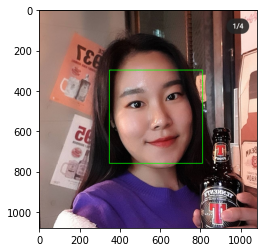

In [ ]:
# Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ Î¶¨Ïä§Ìä∏
# Ïó¨Îü¨ ÏñºÍµ¥Ïù¥ ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


dlib.rectangleÍ∞ùÏ≤¥Îäî left(), top(), right(), bottom(), height(), width() Îì±Ïùò Î©§Î≤Ñ Ìï®ÏàòÎ•º Ìè¨Ìï®

### **3. ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨ face landmark**

 weight file Îã§Ïö¥Î∞õÍ∏∞

In [ ]:
! wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
! ls
! cp ./shape_predictor_68_face_landmarks.dat.bz2 ./project3/model/
! bzip2 -d /content/project3/model/shape_predictor_68_face_landmarks.dat.bz2

--2022-01-11 08:03:41--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‚Äòshape_predictor_68_face_landmarks.dat.bz2.1‚Äô

     shape_predicto  24%[===>                ]  14.81M  5.89MB/s               ^C
aiffel	     shape_predictor_68_face_landmarks.dat.bz2
project3     shape_predictor_68_face_landmarks.dat.bz2.1
sample_data
bzip2: Output file /content/project3/model/shape_predictor_68_face_landmarks.dat already exists.


In [ ]:
# Ï†ÄÏû•Ìïú landmark Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò§Í∏∞

model_path = '/content/project3/model/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´üõ∏")

üå´üõ∏


‚ùó landmark_predictor Îäî RGB Ïù¥ÎØ∏ÏßÄÏôÄ dlib.rectangleÏùÑ ÏûÖÎ†• Î∞õÏïÑ dlib.full_object_detection Î•º Î∞òÌôò

In [ ]:
list_landmarks = []

# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ ÎßàÎã§ face landmarkÎ•º Ï∞æÏïÑÎÉÖÎãàÎã§
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark Ï¢åÌëúÎ•º Ï†ÄÏû•Ìï¥Îë°ÎãàÎã§
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


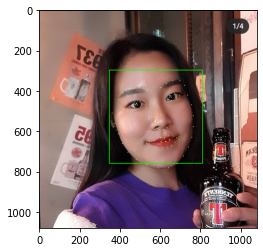

In [ ]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [ ]:
#ÏΩî Ï¢åÌëú ÌôïÏù∏
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # ÏΩîÏùò indexÎäî 30 ÏûÖÎãàÎã§
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(612, 552)
(x,y) : (612,321)
(w,h) : (463,463)


(463, 463, 3)


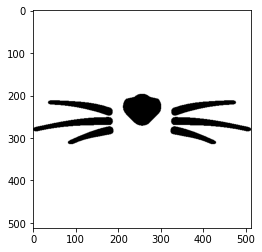

In [ ]:
sticker_path = '/content/sample_data/cat.png'
img_sticker = cv2.imread(sticker_path) # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
plt.imshow(img_sticker)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

In [ ]:
#x, y Ï¢åÌëú Ï°∞Ï†à
refined_x = x - w // 2
refined_y = y    #ÏúÑ ÏïÑÎûò ÏúÑÏπòÎ•º Ï°∞Ï†àÌï¥Ï§å
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (381,321)


In [ ]:
#-ÌÅ¨Î°≠
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (381,321)


Ïäù~


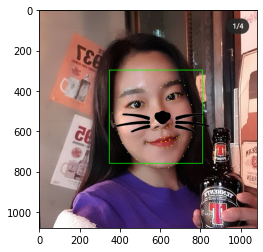

In [ ]:
#Ïä§Ìã∞Ïª§ Ï†ÅÏö© ÌõÑ Ï∂úÎ†•
# Í∏∏Ïñ¥ÏÑú Î≥µÏû°Ìï¥ Î≥¥Ïù¥ÏßÄÎßå img_show[from:to] ÌòïÏãùÏûÖÎãàÎã§
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)    # Ïù¥ Ï°∞Í±¥ÏùÑ Î∞îÍøîÏ§å , Ïñ¥Î†§Ïö¥ Î∂ÄÎ∂ÑÏù¥Íµ∞.. ÎèôÏÑ≠ÎãòÏùÄ img_sticker!=0 Ïù¥Î†áÍ≤å ÌïòÏÖ®Îã§Í≥† Ìï®
print("Ïäù~")

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

5. Ïó¨Îü¨ Ï¢ÖÎ•òÏùò Ïù¥ÎØ∏ÏßÄ ÌÖåÏä§Ìä∏

###**4. ÌöåÍ≥†**

(1) Open CV

Ïª¥Ìì®ÌÑ∞ ÎπÑÏ†Ñ Í¥ÄÎ†® ÌîÑÎ°úÍ∑∏ÎûòÎ∞çÏùÑ ÏâΩÍ≤å Ìï† Ïàò ÏûàÎèÑÎ°ù ÎèÑÏôÄÏ£ºÎäî ÎùºÏù¥Î∏åÎü¨Î¶¨

Ïù¥ÎØ∏ÏßÄ Îî•Îü¨Îãù(ÏïåÌååÍ≥† Í∏∞Ïà†)ÏóêÎèÑ ÎßéÏù¥ ÌôúÏö©

Ïù¥ÎØ∏ÏßÄÏ±ÑÎÑêÎ°ú  BGR(ÌååÎûë, ÎÖπÏÉâ, Îπ®Í∞ï)ÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê opencvÏóêÏÑú Îã§Î£¨ Ïù¥ÎØ∏ÏßÄÎ•º Îã§Î•∏ Ïù¥ÎØ∏ÏßÄ ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÌôúÏö©ÌïòÏó¨ Ï∂úÎ†•ÌïòÎ†§Î©¥ ÏÉâ Î≥¥Ï†ïÏ≤òÎ¶¨Í∞Ä ÌïÑÏöîÌï®

(2) Ïª¥Ìì®ÌÑ∞ ÎπÑÏ†Ñ(Computer Vision)Ïù¥ÎûÄ?

Ïπ¥Î©îÎùº, ÏóêÏßÄ Í∏∞Î∞ò ÎòêÎäî ÌÅ¥ÎùºÏö∞Îìú Í∏∞Î∞ò Ïª¥Ìì®ÌåÖ, ÏÜåÌîÑÌä∏Ïõ®Ïñ¥ Î∞è Ïù∏Í≥µ ÏßÄÎä•(AI)ÏùÑ Í≤∞Ìï©ÌïòÏó¨ ÏãúÏä§ÌÖúÏù¥ ÏÇ¨Î¨ºÏùÑ "ÌôïÏù∏"ÌïòÍ≥† ÏãùÎ≥ÑÌï† Ïàò ÏûàÍ≤å Ìï®

(3)  np.where
 np.where(Î∞∞Ïó¥Ïóê ÎåÄÌïú Ï°∞Í±¥Î¨∏, Ï∞∏ÏùºÎïå Í∞í, Í±∞ÏßìÏùºÎïå Í∞í)Ïùò ÌòïÌÉúÎ°ú ÏÇ¨Ïö©
 https://yganalyst.github.io/data_handling/memo_3/